# Medical School Admissions Dataset Curation via Web Scraping and Exploratory Data Analysis


### Author & Background

- Michael Welsh (mjw467@drexel.edu) - CHOP Researcher


### Overview of Project


The average acceptance rate out of the ~170 medical schools in the U.S. is around 5.5%.  Airfare for interviewing alone can exceed $500, on top of the other hundreds of dollars to apply and send primary/secondary applications to just a single school.  Despite these expenses, it's necessary to apply to 20-30 schools to get an acceptance, and for many, you cannot afford, both literally and figuratively, to not get accepted and reapply the following year.  How do you pick your list of schools to maximize your chances of acceptance?


In this final project, medical school admission statistics are scraped off the Association of American Medical Colleges' (AAMC's) Medical School Admission Requirements (MSAR) website (https://students-residents.aamc.org/) and turned into a dataset.  AAMC provides a wealth of knowledge at the school-level, but falls short of having any sort of analysis across all schools, especially tailored to individual applicants, which is the motivation behind this project.  Now, this dataset includes numerous things such as MCAT (Medical College Admissions Test)/GPA quantiles, in/out-of-state acceptance rates/bias, demographics, geographics, funding and institution type, residency match rates by specialty, etc.  Exploratory data analysis is then performed to determine the list of schools my fiancée (PA resident), based on her background, should apply to, to maximize her chances of acceptance this cycle.


### Dataset Curation & Data Usage

AAMC provides yearly reports of MSAR for every medical school in the United States and surrounding regions (such as Canada).  Accessing their data requires a subscription account, for which I have.  Their data usage policy states that a user can use their data for personal and non-profit educational/research purposes (so long as data sharing is restricted).  Web scraping using traditional methods is explicitly prohibited, but manual user-level scraping is allowed.  For each school, I manually copy/paste the entire associated webpage text into a standalone text file.  Then, using regular expressions and some python wizardry, I parse each text file representing each school and create a usable CSV file.  Some manual intervention is required for some schools that have inconsistent formats in some features.  The only strictly-manual recording needing to be done is of the GPA/science GPA quantiles and if any applicants matriculated from Pennsylvania (due to regular expression limitations and a lack of standardized format on their website).

During curation, some medical schools were excluded by default because they did not meet the following inclusion criteria:
- School must have provided data (some schools didn't because they were just founded or are stingy)
- School must be in the U.S.
- If the school is not in PA, then it must accept out-of-state students.

The end result was a dataset of <b>139 schools</b> and <b>152 features</b>.  Despite all these features, only a small subset was determined useful in this analysis.

Dataset curation files can be found in the "dataset_curation" directory.  I have each school's website textual information saved as its own .txt file, and the manually obtained fields (GPA, etc) saved in a CSV file.  The "dataset_curation.ipynb" notebook processes all this saved information and turns it into the "dataset.csv" file found in this parent-level directory for use in exploratory data analysis.


### Analytic Approach

The goal is to determine the list of schools my fiancée (PA resident), based on her background, should apply to, to maximize her chances of acceptance this cycle.  This can easily be done if a means of ranking/ordering schools based on chances of acceptance exists.  MCAT/total-GPA/science-GPA quantiles (quantiles of fiancée's stats relative to that respective school), and the odds of being interviewed as a PA resident, were determined to be the most important factors in estimating chances of acceptance with a school.  In otherwords, the higher these 4 metrics, the higher the chances of acceptance into that respective school.  It's hard to say which metric is more important (weighs more) than the others.  Generally speaking, it is well known that a person's MCAT score is weighed more heavily by interview committees than other scores, but that's it.  With these 4 metrics, a pseudo-ranking algorithm was developed and used to rank/order schools based on chances of acceptance.  First, these 4 metrics need to be further explained.

We are only given the 10/25/50/75/90 \% quantile values for each school. The goal is to estimate which quantile the user's stats belong to for each test for each school. If we can determine the difference between Q2 and Q1, and Q3 and Q2 are roughly equal (in other words, if (Q2 - Q1) / (Q3 - Q2) is roughly equal to 1), then we can conclude the distribution is roughly normal and can estimate the mean/std accordingly to further calculate the quantiles of the user's stats. In other words, if roughly normal, we could say mean = median and std = (Q2 − Q1) / 0.674 = (Q3 − Q2) / 0.674.

We end up seeing the MCAT score across all schools is fairly normal, with the mean being roughly equal to the median (outliers definitely exist, which skews the distribution slightly left, since the mean is marginally greater than the median). Similarly, the total GPA is also fairly normal, with the mean and median being roughly equal and the mean being slightly larger than the median indicating the distribution being slightly skewed left. The science GPA has some divide-by-zero issues, meaning some Q3's = Q2's, which is a phenomenon I did see in curating this dataset, but Q1/median/Q3 is pretty much the same as the total GPA, so we can conclude it is also fairly equal.

All in all, we can conclude that the MCAT, total GPA, and science GPA's reported by schools are fairly normal; therefore, we can estimate the mean/std fairly accurately, which are then used to calculate what quantile's the user's stats are in for each school.  Note that I use the words "user" and "fiancée" interchangeably.

I then analyze the odds of being interviewed given the user is a PA resident.  Any odds(interview | PA resident) >= 1 is great, because it means you are that much more likely to get interviewed purely based on living in PA.

We do interviews here instead of whether or not they matriculated, because it is common knowledge that no one will turn down an interview, but people most certainly turn down out-of-state schools (assuming they got offers elsewhere) due to inflated out-of-state tuition prices. In other words, the odds of matriculation are potentially more biased than the odds of being interviewed. 3 schools had no interview data, so their matriculation data was used in-place for a rough estimate of what their interview data might be. Since it was only 3 schools, this imputation method is fine.

Now that the 4 above metrics are calculated, the schools can be ranked via the pseudo-ranking algorithm.  The way this is done is by counting from 1.0 to 0.0 and keeping track of which schools have all 4 metrics greater than or equal to the counter (a sort of quantile threshold). This allows us to determine which schools fall at a specific quantile. If multiple schools fall at a specific quantile, they are sorted by the above 4 metrics in order (so sorted first by MCAT quantile because we can generally say its most important, then by total-GPA quantile, then science-GPA quantile, and finally by Odds). The result is a pseudo-ranking of schools from best to worst chances of acceptance.  These rankings/metrics are saved out to a CSV.  Note the scale: the best school (highest ranking school) has a ranking of 1, and the worst school (lowest ranking school) has a ranking of 139.

I first analyze the rankings by state using a choropleth map.  It's apparent that the northeast, south, and west-coast states have schools that have the greatest chances of acceptance.  I then list the top 20 schools.  Furthermore, I list all schools in just California, and all schools in just Pennsylvania.  My fiancée has an affinity towards both those states.  One thing worth noting is she went to PSU for her undergraduate degree.  Penn State Hershey Medical School has a known bias towards Penn State undergrads and her chances of acceptance at Hershey are presumably higher than the listed metrics.

Finally, I perform PCA on all features (including the 4 above metrics).  It's clear the top 20 ranked schools aren't obvious and PCA/Clustering methods provide much less insight than this described analytic approach.


### Results

Results can be found in "med_schools_ranked_relative_to_fiancee.csv", "med_schools_ranked_relative_to_fiancee_just_california.csv", and "med_schools_ranked_relative_to_fiancee_just_pennsylvania.csv".  As mentioned in the analytic approach, the first CSV has all schools ranked/ordered by chances of acceptance (highest chance to lowest).  The top n schools can easily be selected.  And then lists of schools in CA and PA, still ranked/ordered accordingly, are in the other 2 CSVs.


### Limitations

The hardest part of this project was the dataset curation process.  It took a substantial amount of time collecting data due to the sheer number of schools and features, even with using regular expressions.  Also, AAMC's data usage policy means an automatic pipeline to download updated yearly information is prohibited, meaning this project would always require the manual data collection step if turned into a tool for other users, and I'd have to limit how information is shared to further adhere to their usage policy.  Also, I did my analysis from the perspective of a PA applicant who wants to stay in the U.S, which obviously isn't representative of all applicants.  All this said, I was able to produce a realistically great list of schools for my someone like my fiancée to apply to; thus, I met my goal.


# Code


### Setup User's (Fiancée's) Stats

In [46]:
user_mcat      = 512
user_total_gpa = 3.69
user_sci_gpa   = 3.48

### Setup Environment & Load Data

In [16]:
# Standard modules
import matplotlib.pyplot as plt
from   matplotlib.scale import LogScale
from   matplotlib.ticker import StrMethodFormatter
import numpy as np
import os
from   os.path import exists, join
import pandas as pd
import PIL
import plotly.express as px
from   scipy.stats import norm
import seaborn as sns
from   sklearn.decomposition import PCA

# Pandas specific stuff
pd.set_option('display.float_format', lambda x: '%.8f' % x)
pd.set_option('display.max_rows', None)

# Seaborn specific stuff
sns.set(style='white')

# Notebook specific stuff
from IPython.display import clear_output, display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

In [17]:
# Get paths
dataset_csv_path = 'dataset.csv'

# Error check, make sure paths exist
for p in (dataset_csv_path, ):
    if not exists(p):
        raise RuntimeError(f'Path does not exist: {p}')
    #
#

In [18]:
# Read dataset CSV into DataFrame
df = pd.read_csv(dataset_csv_path)

### Analyze Normality of MCAT, Total GPA, and Science GPA Data


We are only given the 10/25/50/75/90 % quantile values for each school.  The goal is to estimate which quantile the user's stats belong to for each test for each school.  If we can determine the difference between Q2 and Q1, and Q3 and Q2 are roughly equal (in other words, if (Q2 - Q1) / (Q3 - Q2) is roughly equal to 1), then we can conclude the distribution is roughly normal and can estimate the mean/std accordingly to further calculate the quantiles of the user's stats.  In other words, if roughly normal, we could say mean = median and std = (Q2 − Q1) / 0.674 = (Q3 − Q2) / 0.674.

In [19]:
((df['MCAT_50th_percentile'] - df['MCAT_25th_percentile']) / (df['MCAT_75th_percentile'] - df['MCAT_50th_percentile'])).describe()

count   139.00000000
mean      1.11366906
std       0.46372543
min       0.50000000
25%       1.00000000
50%       1.00000000
75%       1.33333333
max       5.00000000
dtype: float64

In [20]:
((df['GPA_total_50th_percentile'] - df['GPA_total_25th_percentile']) / (df['GPA_total_75th_percentile'] - df['GPA_total_50th_percentile'])).describe()

count   139.00000000
mean      1.52713094
std       0.37882720
min       0.65000000
25%       1.27272727
50%       1.45454545
75%       1.75000000
max       2.50000000
dtype: float64

In [21]:
((df['GPA_sci_50th_percentile'] - df['GPA_sci_25th_percentile']) / (df['GPA_sci_75th_percentile'] - df['GPA_sci_50th_percentile'])).describe()

count   139.00000000
mean             inf
std              NaN
min       0.72727273
25%       1.23443223
50%       1.46666667
75%       1.75000000
max              inf
dtype: float64

He were see that the MCAT score across all schools is fairly normal, with the mean being roughly equal to the median (outliers definitely exist, which skews the distribution slightly left, since the mean is marginally greater than the median).  Similarly, the total GPA is also fairly normal, with the mean and median being roughly equal and the mean being slightly larger than the median indicating the distribution being slightly skewed left.  The science GPA has some divide-by-zero issues, meaning some Q3's = Q2's, which is a phenomenon I did see in curating this dataset, but Q1/median/Q3 is pretty much the same as the total GPA, so we can conclude it is also fairly equal.  


All in all, we can conclude that the MCAT, total GPA, and science GPA's reported by schools are fairly normal; therefore, we can estimate the mean/std fairly accurately, which will be used to calculate what quantile's the user's stats are in for each school.

### MCAT, Total GPA, and Science GPA are Roughly Normal => Estimate User's Stats' Quantiles Relative to Each School

In [22]:
# Define function to apply
def estimate_user_stats_quantiles(df_row):
    # MCAT
    mcat_q1   = df_row['MCAT_25th_percentile']
    mcat_q2   = df_row['MCAT_50th_percentile']
    mcat_mean = mcat_q2
    mcat_std  = (mcat_q2 - mcat_q1) / 0.674
    user_mcat_percentile = norm.cdf(user_mcat, mcat_mean, mcat_std)
    
    # Total GPA
    total_gpa_q1   = df_row['GPA_total_25th_percentile']
    total_gpa_q2   = df_row['GPA_total_50th_percentile']
    total_gpa_mean = total_gpa_q2
    total_gpa_std  = (total_gpa_q2 - total_gpa_q1) / 0.674
    user_total_gpa_percentile = norm.cdf(user_total_gpa, total_gpa_mean, total_gpa_std)
    
    # Science GPA
    sci_gpa_q1   = df_row['GPA_sci_25th_percentile']
    sci_gpa_q2   = df_row['GPA_sci_50th_percentile']
    sci_gpa_mean = sci_gpa_q2
    sci_gpa_std  = (sci_gpa_q2 - sci_gpa_q1) / 0.674
    user_sci_gpa_percentile = norm.cdf(user_sci_gpa, sci_gpa_mean, sci_gpa_std)
    
    # Done
    return pd.Series({
        'estimated_user_quantile_MCAT':      user_mcat_percentile,
        'estimated_user_quantile_total_GPA': user_total_gpa_percentile,
        'estimated_user_quantile_sci_GPA':   user_sci_gpa_percentile
    })
# end estimate_user_stats_quantiles

# Apply
estimated_cols     = ['estimated_user_quantile_MCAT', 'estimated_user_quantile_total_GPA', 'estimated_user_quantile_sci_GPA']
df[estimated_cols] = df.apply(estimate_user_stats_quantiles, axis=1)

# Describe
df[estimated_cols].describe()

,estimated_user_quantile_MCAT,estimated_user_quantile_total_GPA,estimated_user_quantile_sci_GPA
count,139.00000000,139.00000000,139.00000000
mean,0.39844017,0.27880761,0.17157088
std,0.23133525,0.13825114,0.11343061
min,0.00037584,0.00022848,0.00000003
25%,0.19975407,0.18441512,0.08604451
50%,0.41111930,0.27602004,0.15600821
75%,0.58888070,0.38152467,0.25015566
max,0.88090043,0.66084458,0.48655819


### Analyze Odds(Interview | PA Resident)


Any odds(interview | PA resident) >= 1 is great, because it means you are that much more likely to get interviewed purely based on living in PA.


We do interviews here instead of whether or not they matriculated, because it is common knowledge that no one will turn down an interview, but people most certainly turn down out-of-state schools (assuming they got offers elsewhere) due to inflated out-of-state tuition prices.  In otherwords, the odds of matriculation is potentially more biased than the odds of being interviewed.  3 schools had no interview data, so their matriculation data was used in-place for a rough estimate of what their interview data might be.  Since it was only 3 schools, this imputation method is fine.

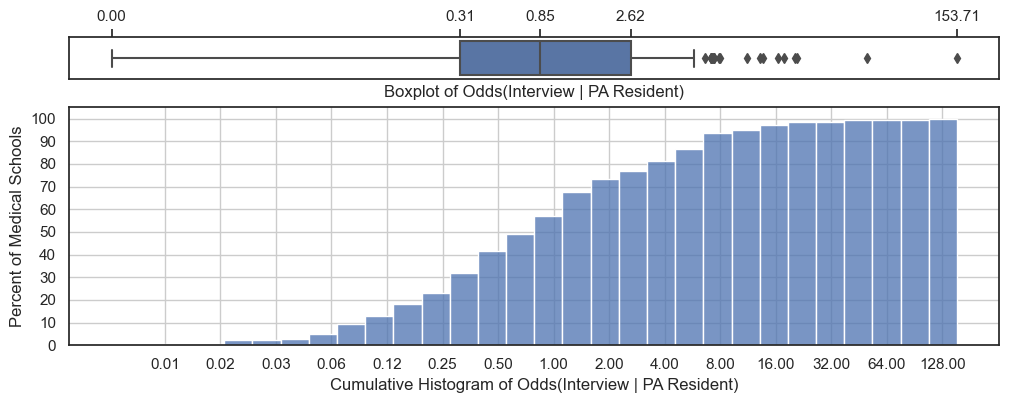

In [23]:
# Calculate interview odds
df['interview_odds_given_PA_resident'] = df['num_interviewed_out_of_state'] / df['num_interviewed_in_state']
iona = df['interview_odds_given_PA_resident'].isna()
df.loc[iona, 'interview_odds_given_PA_resident'] = df.loc[iona, 'num_matriculated_out_of_state'] / df.loc[iona, 'num_matriculated_in_state']
df.loc[df['state'] == 'PA', 'interview_odds_given_PA_resident'] = 1 / df['interview_odds_given_PA_resident']
x = df['interview_odds_given_PA_resident'].values

# Plot
fig, ax = plt.subplots(2, sharex=False, gridspec_kw={'height_ratios': [0.15, 0.85]}, figsize=(12, 4))
sns.boxplot( x=x, ax=ax[0], orient='h')
sns.histplot(x=x, ax=ax[1], log_scale=True, bins=30, cumulative=True, stat='percent')
ax[0].set_xscale(LogScale(axis=0, base=2))
ax[0].set_xticks([np.min(x), np.quantile(x, 0.25), np.quantile(x, 0.50), np.quantile(x, 0.75), np.max(x)])
ax[0].xaxis.set_major_formatter(StrMethodFormatter('{x:.2f}'))
ax[0].xaxis.tick_top()
ax[0].set_xlabel('Boxplot of Odds(Interview | PA Resident)')
ax[1].set_xscale(LogScale(axis=0, base=2))
ax[1].xaxis.set_major_formatter(StrMethodFormatter('{x:.2f}'))
ax[1].grid(True, which='both', ls='-')
ax[1].set_xticks([2 ** i for i in range(-7, 7 + 1)])
ax[1].set_yticks([i for i in range(0, 100 + 10, 10)])
ax[1].set_xlabel('Cumulative Histogram of Odds(Interview | PA Resident)')
ax[1].set_ylabel('Percent of Medical Schools')
plt.show()

### Rank Schools Based on User’s Chances of Acceptance


We now have the following metrics that are presumed to be most deterministic of the user being accepted:
- Estimated user MCAT quantile
- Estimated user total-GPA quantile
- Estimated user science-GPA quantile
- Odds(interview | PA resident)


It's hard to say one metric is more important (weighs more) than the other.  We do know, generally speaking, MCAT is weighed more heavily than total/science GPA on interview committees.  We seek to rank the schools in some sort of pseudo-logical order.  The way this will be done is by counting from 1.0 to 0.0 and keeping track of which schools have all 4 metrics greater than or equal to the counter (a sort of quantile threshold).  This allows us to determine which schools fall at a specific quantile.  If multiple schools fall at a specific quantile, they are sorted by the above 4 metrics in order (so sorted first by MCAT quantile because we can generally say its most important, then by total-GPA quantile, then science-GPA quantile, and finally by Odds).  The result is a pseudo-ranking of schools from best to worst chances of acceptance.  


Note the scale: the best school (highest ranking school) has a ranking of 1, and the worst school (lowest ranking school) has a ranking of 139.

In [24]:
# Define function to get a subset of the original DataFrame where the 4 metrics are >= the given quantile threshold
def get_subset_with_4_metrics_gte_quantile(quant_thresh):
    df_subset = df.copy()
    interview_quant_thresh = np.quantile(df_subset['interview_odds_given_PA_resident'].values, quant_thresh)
    df_subset = df_subset[df_subset['interview_odds_given_PA_resident']  >= interview_quant_thresh]
    df_subset = df_subset[df_subset['estimated_user_quantile_MCAT']      >= quant_thresh]
    df_subset = df_subset[df_subset['estimated_user_quantile_total_GPA'] >= quant_thresh]
    df_subset = df_subset[df_subset['estimated_user_quantile_sci_GPA']   >= quant_thresh]
    return df_subset[
        ['name', 'state', *estimated_cols, 'interview_odds_given_PA_resident']
    ].sort_values(by=[*estimated_cols, 'interview_odds_given_PA_resident'], ascending=False)
# end get_subset_with_4_metrics_gte_quantile

# Calculate/print ranking
df_ranked = None
for quantile_threshold in range(100, 0 - 1, -1):
    quantile_threshold = quantile_threshold / 100
    df_subset = get_subset_with_4_metrics_gte_quantile(quantile_threshold)
    if df_ranked is None and df_subset.shape[0] > 0:
        df_ranked = pd.DataFrame(columns=df_subset.columns)
        for row_loc_idx in df_subset.index:
            df_ranked.loc[df_ranked.shape[0]] = df_subset.loc[row_loc_idx]
        #
    #
    else:
        for row_loc_idx in df_subset.index:
            if df_subset.loc[row_loc_idx, 'name'] not in df_ranked['name'].values:
                df_ranked.loc[df_ranked.shape[0]] = df_subset.loc[row_loc_idx]
            #
        #
    #
#
df_ranked.index = [i for i in range(1, df_ranked.index.shape[0] + 1)]
df_ranked.index.name = 'ranking'
assert(df_ranked.shape[0] == 139 and df_ranked['name'].value_counts()[df_ranked['name'].value_counts() > 1].shape[0] == 0)

# Save
df_ranked.to_csv('med_schools_ranked_relative_to_fiancee.csv')

### Visualize School Rankings By State

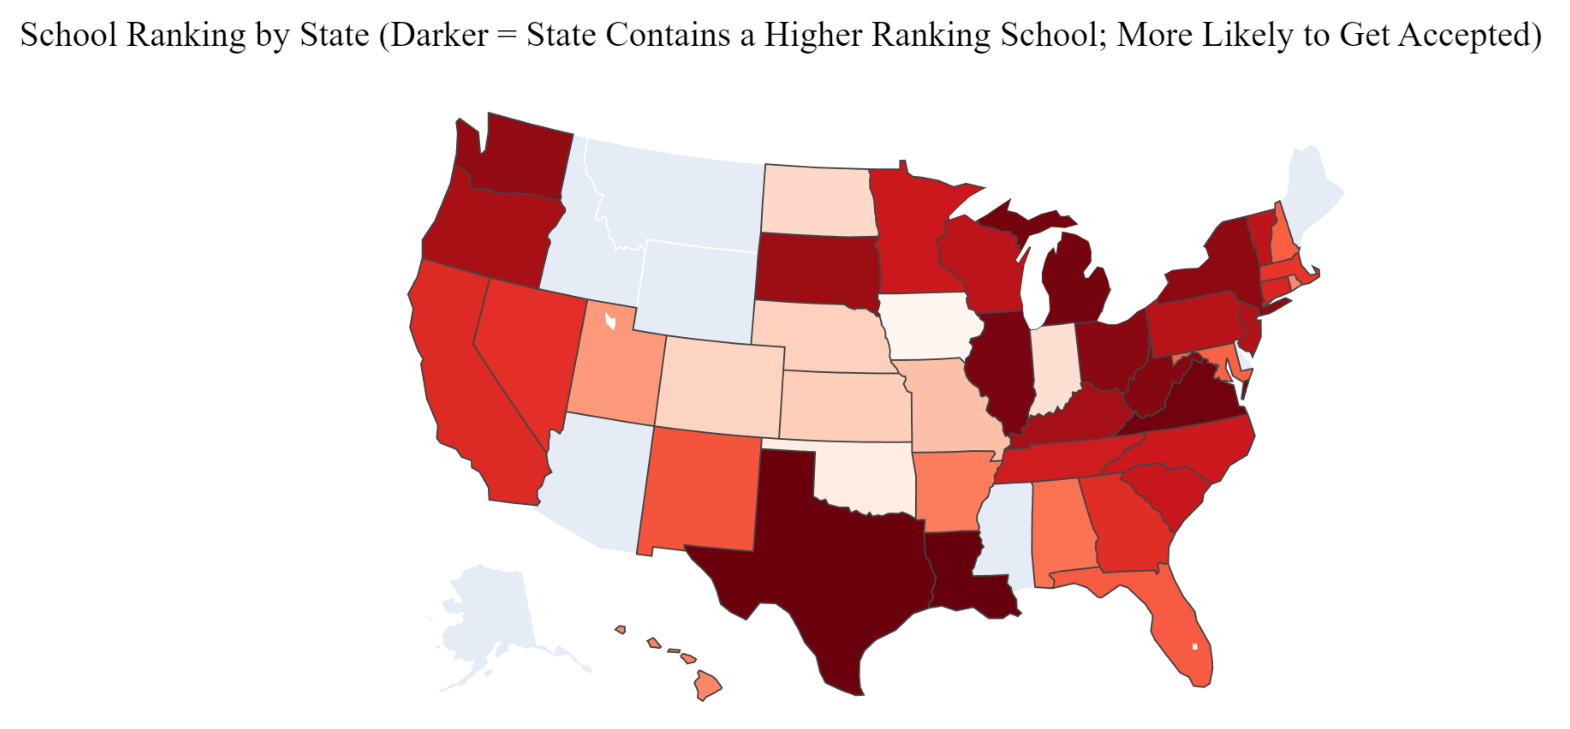

In [45]:
df_choro = None
for ranking in df_ranked.index:
    if df_choro is None:
        df_choro = df_ranked.loc[[ranking]]
    #
    elif df_ranked.loc[ranking, 'state'] not in df_choro['state'].values:
        df_choro.loc[ranking] = df_ranked.loc[ranking]
    #
#
df_choro.index.name = 'Ranking'
fig = px.choropleth(
    df_choro,
    locations=df_choro['state'], 
    locationmode='USA-states', 
    scope='usa',
    color=df_choro.index,
    color_continuous_scale='reds_r'
)
fig.update_layout(
    title_text = 'School Ranking by State (Darker = State Contains a Higher Ranking School; More Likely to Get Accepted)',
    title_font_family='Times New Roman',
    title_font_size = 22,
    title_font_color='black', 
    title_x=0.45,
    coloraxis_showscale=False
)
fig.show()

# GitHub doesn't render interactive JS notebook components, so plot a picture of what you should see
clear_output()
plt.figure(figsize=(20, 20))
plt.imshow(PIL.Image.open('choropleth_for_github.png'))
plt.axis('off')
plt.show()

### Select Schools to Apply to


Finally, we can select/list the top 20 schools that the user is most likely to be accepted into.

In [719]:
df_ranked.loc[:20]

,name,state,estimated_user_quantile_MCAT,estimated_user_quantile_total_GPA,estimated_user_quantile_sci_GPA,interview_odds_given_PA_resident
ranking,,,,,,
1,Tulane University School of Medicine,LA,0.60626600,0.53703452,0.46744384,5.75268817
2,Anne Burnett Marion School of Medicine at TCU,TX,0.63194155,0.52828018,0.44638500,2.18348624
3,Virginia Tech Carilion School of Medicine,VA,0.50000000,0.66084458,0.40675513,4.93750000
4,Central Michigan University College of Medicine,MI,0.74984434,0.50000000,0.38941912,0.51290323
5,Rush Medical College of Rush University Medica...,IL,0.58888070,0.48418725,0.34521458,3.64285714
6,University of Illinois College of Medicine,IL,0.55361500,0.48655819,0.34869498,0.90556901
7,Marshall University Joan C. Edwards School of ...,WV,0.88090043,0.42207681,0.35006579,0.41216216
8,The University of Toledo College of Medicine a...,OH,0.58888070,0.41509630,0.33183975,0.47019868
9,New York Medical College,NY,0.32659561,0.48506532,0.34295930,1.04102564


The user (fiancée) also has a strong affinity towards California schools, so make/print/save a separate list of containing just CA schools, ordered by ranking.

In [720]:
df_ranked_ca = df_ranked.loc[df_ranked['state'] == 'CA']
df_ranked_ca.to_csv('med_schools_ranked_relative_to_fiancee_just_california.csv')
df_ranked_ca

,name,state,estimated_user_quantile_MCAT,estimated_user_quantile_total_GPA,estimated_user_quantile_sci_GPA,interview_odds_given_PA_resident
ranking,,,,,,
33,"University of California, Los Angeles David Ge...",CA,0.32659561,0.33516898,0.22516049,1.01555556
40,Keck School of Medicine of the University of S...,CA,0.25015566,0.35403684,0.20406701,0.34549356
68,Kaiser Permanente Bernard J. Tyson School of M...,CA,0.13064798,0.23396654,0.15219902,1.24451411
69,"University of California, San Diego School of ...",CA,0.25015566,0.25015566,0.12286614,0.34259259
82,California Northstate University College of Me...,CA,0.32659561,0.29487443,0.18714815,0.10600707
89,Loma Linda University School of Medicine,CA,0.50000000,0.14476736,0.08882919,1.18902439
94,"University of California, Irvine, School of Me...",CA,0.25015566,0.23510333,0.08224546,0.13636364
114,"University of California, San Francisco, Schoo...",CA,0.19975407,0.10016710,0.03021991,0.48762376
120,"University of California, Davis, School of Med...",CA,0.56690503,0.57292195,0.41988019,0.03655914


Similarly, the user (fiancée) also has a strong affinity towards Pennsylvania schools, so make/print/save a separate list of containing just PA schools, ordered by ranking.  One interesting thing worth mentioning is that she went to PSU for her undergraduate degree, and Penn State Hershey Medical College has a bias towards accepting PSU alumnia, so her chances of being accepted into Penn State Hershey are potentially much greater than what's listed here.

In [721]:
df_ranked_pa = df_ranked.loc[df_ranked['state'] == 'PA']
df_ranked_pa.to_csv('med_schools_ranked_relative_to_fiancee_just_pennsylvania.csv')
df_ranked_pa

,name,state,estimated_user_quantile_MCAT,estimated_user_quantile_total_GPA,estimated_user_quantile_sci_GPA,interview_odds_given_PA_resident
ranking,,,,,,
20,Lewis Katz School of Medicine at Temple Univer...,PA,0.50000000,0.41111930,0.26914817,0.45404664
36,Drexel University College of Medicine,PA,0.50000000,0.35403684,0.21116631,0.28973277
39,Pennsylvania State University College of Medicine,PA,0.50000000,0.32234266,0.20406701,1.12676056
43,Geisinger Commonwealth School of Medicine,PA,0.41111930,0.31055893,0.19549643,0.94549266
75,Sidney Kimmel Medical College at Thomas Jeffer...,PA,0.32659561,0.25015566,0.11713884,0.32061069
99,University of Pittsburgh School of Medicine,PA,0.19975407,0.16983099,0.07019033,0.40659341
137,Perelman School of Medicine at the University ...,PA,0.00037584,0.00614983,0.00016240,0.10481586


### Perform PCA of Every Possible Feature


Purely for academic reasons.  All 4 feature-engineered metrics are also included in this principle component analysis.

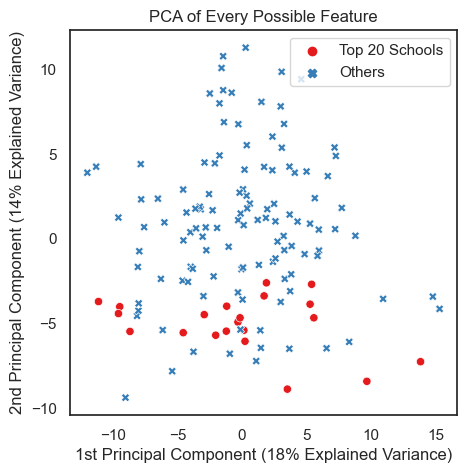

In [722]:
object_cols_to_convert_to_dummy = ['accepts_out_of_state', 'school_type', 'online_available', 'research_thesis_req_during_med_school']
df_pca = df_ranked[['name']].merge(
    df.merge(
        pd.get_dummies(
            df[object_cols_to_convert_to_dummy]
        ),
        left_index=True,
        right_index=True
    ), 
    on='name'
).fillna(0).select_dtypes(exclude=['object'])
df_pca = (df_pca - df_pca.mean()) / df_pca.std()
pca    = PCA(n_components=2)
vals   = pca.fit_transform(df_pca.values)
cmap   = pd.Series(df_pca.index.values <= 20).apply(lambda x: 'Top 20 Schools' if x else 'Others')
plt.figure(figsize=(5, 5))
sns.scatterplot(x=vals[:, 0], y=vals[:, 1], hue=cmap, style=cmap, palette='Set1')
plt.title('PCA of Every Possible Feature')
first_pc_explained_var_percent = pca.explained_variance_ratio_[0] * 100
plt.xlabel(f'1st Principal Component ({first_pc_explained_var_percent:.0f}% Explained Variance)')
second_pc_explained_var_percent = pca.explained_variance_ratio_[1] * 100
plt.ylabel(f'2nd Principal Component ({second_pc_explained_var_percent:.0f}% Explained Variance)')
plt.show()

We can see that the analysis/feature engineering was presumably much more insightful than approaching EDA via PCA/Clustering.